# House Prices Prediction Project 

In [60]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv('house_prices_dataset.csv')

In [62]:
df

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903
...,...,...,...,...,...
9995,2650.551032,7,9,18.126034,431344.267823
9996,1000.827516,2,53,24.479692,6650.271134
9997,1647.341638,5,80,2.189312,233698.384301
9998,2247.882787,6,73,27.931014,280766.827379


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   square_feet           10000 non-null  float64
 1   num_rooms             10000 non-null  int64  
 2   age                   10000 non-null  int64  
 3   distance_to_city(km)  10000 non-null  float64
 4   price                 10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [64]:
df.astype(int)

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248,3,92,22,200374
1,1930,2,22,13,268784
2,2323,6,33,21,315020
3,2761,3,63,10,355111
4,1882,7,54,25,234197
...,...,...,...,...,...
9995,2650,7,9,18,431344
9996,1000,2,53,24,6650
9997,1647,5,80,2,233698
9998,2247,6,73,27,280766


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   square_feet           10000 non-null  float64
 1   num_rooms             10000 non-null  int64  
 2   age                   10000 non-null  int64  
 3   distance_to_city(km)  10000 non-null  float64
 4   price                 10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [66]:
df.describe()

,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263011.571609
std,501.021194,1.71116,28.992336,8.325101,98336.945117
min,500.000000,2.00000,0.000000,1.000161,-95613.138249
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3963.118853,7.00000,99.000000,29.993892,660168.255648


In [67]:
df.duplicated().sum()

np.int64(0)

In [68]:
df.isnull()

,square_feet,num_rooms,age,distance_to_city(km),price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9995,False,False,False,False,False
9996,False,False,False,False,False
9997,False,False,False,False,False
9998,False,False,False,False,False


In [69]:
df.isna().sum()

square_feet             0
num_rooms               0
age                     0
distance_to_city(km)    0
price                   0
dtype: int64

<Axes: xlabel='num_rooms'>

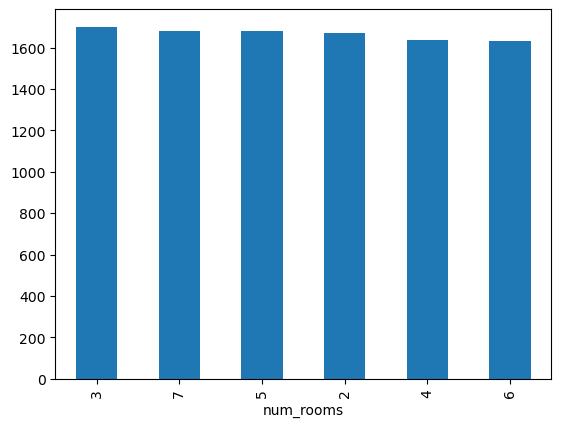

In [70]:
df['num_rooms'].value_counts().plot(kind="bar")

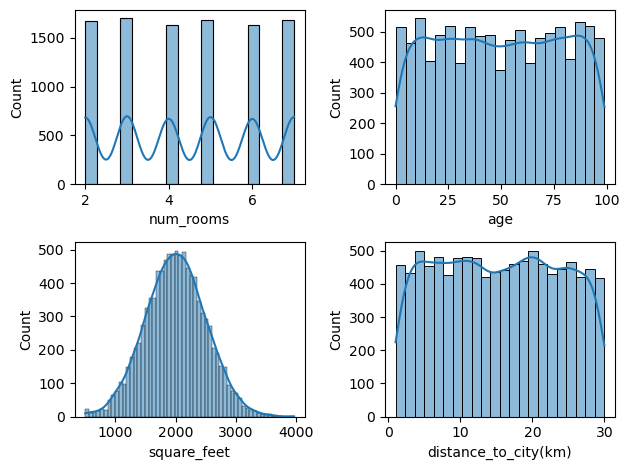

In [71]:
def plotting(var,num): 
    plt.subplot(2,2,num)
    sns.histplot(df[var],kde=True)

plotting('num_rooms',1)
plotting('age',2)
plotting('square_feet',3)
plotting('distance_to_city(km)',4) 

plt.tight_layout()

<Axes: >

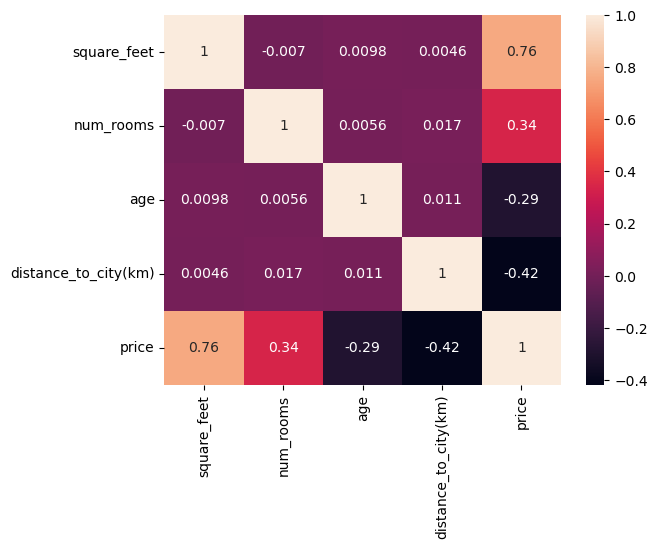

In [72]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [73]:
# as there is no object and boolean datatype in this dataset so there is no need of applying encoding in it 


In [74]:
# we will simply scale the columns by standard scaler (-3 to 3)

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [99]:
cols = ['square_feet','num_rooms','age','distance_to_city(km)']
df[cols] = scaler.fit_transform(df[cols])

In [100]:
df

,square_feet,num_rooms,age,distance_to_city(km),price
0,0.497428,-0.873778,1.465395,0.917251,200374.090410
1,-0.136288,-1.458207,-0.949157,-0.165519,268784.847337
2,0.648102,0.879506,-0.569727,0.737421,315020.857676
3,1.521703,-0.873778,0.465081,-0.602847,355111.468459
4,-0.231986,1.463934,0.154638,1.216028,234197.123903
...,...,...,...,...,...
9995,1.300217,1.463934,-1.397574,0.332011,431344.267823
9996,-1.992670,-1.458207,0.120145,1.095242,6650.271134
9997,-0.702213,0.295078,1.051472,-1.582382,233698.384301
9998,0.496481,0.879506,0.810017,1.509831,280766.827379


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   square_feet           10000 non-null  float64
 1   num_rooms             10000 non-null  float64
 2   age                   10000 non-null  float64
 3   distance_to_city(km)  10000 non-null  float64
 4   price                 10000 non-null  float64
dtypes: float64(5)
memory usage: 390.8 KB


In [102]:
# splitting datasets

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X = df.drop("price",axis=1) 
y = df['price']

In [105]:


X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.20, random_state=42)

In [106]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [107]:
model.fit(X_train,y_train)

LinearRegression()

In [108]:
y_pred = model.predict(X_test)

In [110]:
y_pred

array([316636.89860441, 245793.09538071, 222084.4079465 , ...,
       261253.08848688, 254935.74566457, 204914.72083005])

In [111]:
y_test

6252    350281.484718
4684    238534.403227
1731    223550.527413
4742    233196.897663
4521    387859.768667
            ...      
6412     94292.965434
8285    233757.120230
7853    265987.099613
1095    285479.358409
6929    222318.905690
Name: price, Length: 2000, dtype: float64

In [112]:
# R2 test for checking the accuracy of the model 
from sklearn.metrics import r2_score 
r2 = r2_score(y_test,y_pred) 
r2

0.960063695761787

In [113]:
# Adjusted R2 test 


In [114]:
n = X_test.shape[0] 
p = X_test.shape[1] 

adj_r2 = 1-( 1-r2)*(n-1) /(n-p-1)
adj_r2

0.9599836229713344